In [3]:
#importing the essential libraries for our project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
mpl.style.use('ggplot')

In [4]:
#reading our csv file

car=pd.read_csv('quikr_car.csv')

In [5]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [6]:
car.tail()

,name,company,year,Price,kms_driven,fuel_type
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN
891,Chevrolet Sail 1.2 LT ABS,Chevrolet,2014,"1,60,000",Petrol,NaN


In [7]:
car.shape

(892, 6)

In [8]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [9]:
backup=car.copy()

In [10]:
car.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [11]:
car=car[car['year'].str.isnumeric()]

In [12]:
car['year']=car['year'].astype(int)

In [13]:
car=car[car['Price']!='Ask For Price']

In [14]:
# Here in betwee prices we have commas(,) so we are replacing it and it is in object type so converted into int type

car['Price']=car['Price'].str.replace(',','').astype(int)

In [15]:
# Here kms_driven has object values with kms at last so we are replacing and spliting the values with (,).

car['kms_driven']=car['kms_driven'].str.split().str.get(0).str.replace(',','')

In [16]:
# here It has nan or null  values and two rows have 'Petrol' in them so we are checking if they are in numeric format or not

car=car[car['kms_driven'].str.isnumeric()]


In [17]:
# here It has nan or null  values and two rows have 'Petrol' in them so we are checking if they are in numeric format or not

car=car[car['kms_driven'].str.isnumeric()]


In [18]:
# here fuel column is having the nan or null values so we are finding out how many null values are there in the dataset
car=car[~car['fuel_type'].isna()]

In [19]:
car.shape


(816, 6)

In [20]:
# So here name and company had spammed data...but with the previous cleaning, those rows got removed.
#Company does not need any cleaning now. Changing car names. Keeping only the first three words

car['name']=car['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [21]:
# So Here we are  Resetting the index of the final cleaned data
car=car.reset_index(drop=True)



In [22]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [23]:
# so here we are creating an another csv file which contains all the replacements etc.
car.to_csv('Cleaned_Car_data.csv')

In [24]:
car.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int64 
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int64(2), object(4)
memory usage: 38.4+ KB


In [25]:
car.describe(include='all')


,name,company,year,Price,kms_driven,fuel_type
count,816,816,816.000000,8.160000e+02,816,816
unique,254,25,NaN,NaN,248,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,45000,Petrol
freq,51,221,NaN,NaN,30,428
mean,NaN,NaN,2012.444853,4.117176e+05,NaN,NaN
std,NaN,NaN,4.002992,4.751844e+05,NaN,NaN
min,NaN,NaN,1995.000000,3.000000e+04,NaN,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,NaN,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,NaN,NaN
75%,NaN,NaN,2015.000000,4.912500e+05,NaN,NaN


In [26]:
car=car[car['Price']<6000000]

In [27]:
car['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

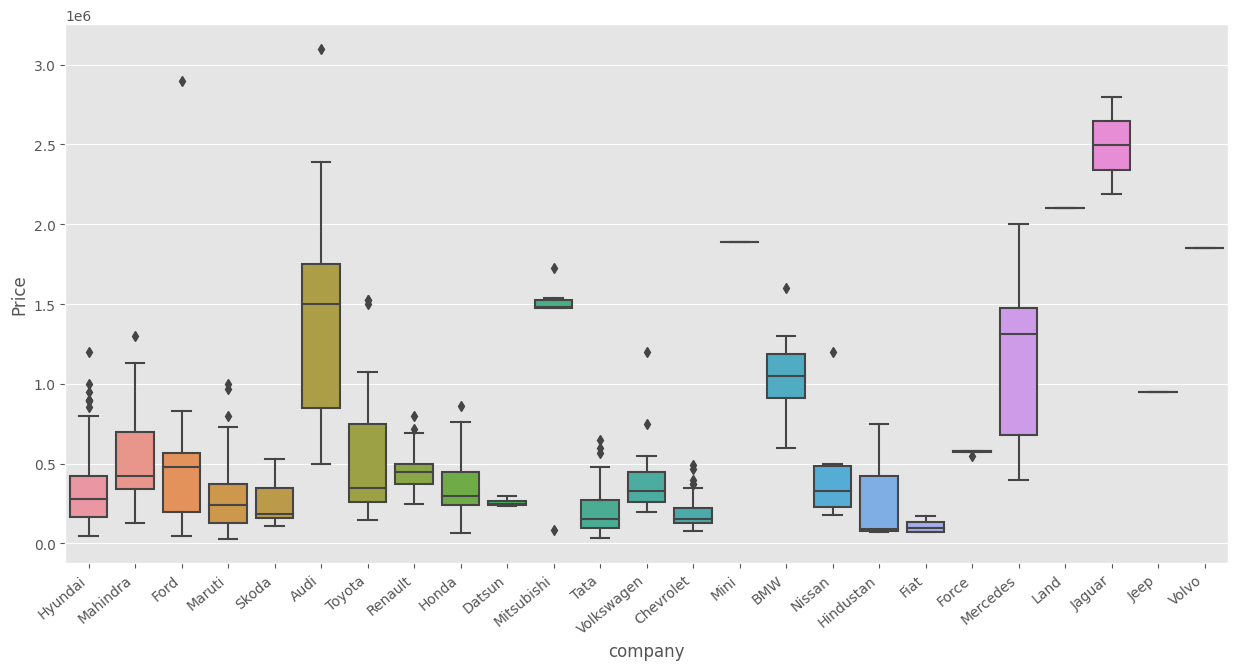

In [28]:
# here we are Checking relationship of Company with Price with the help of seaborn module

plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 7.7% of the points cannot be placed

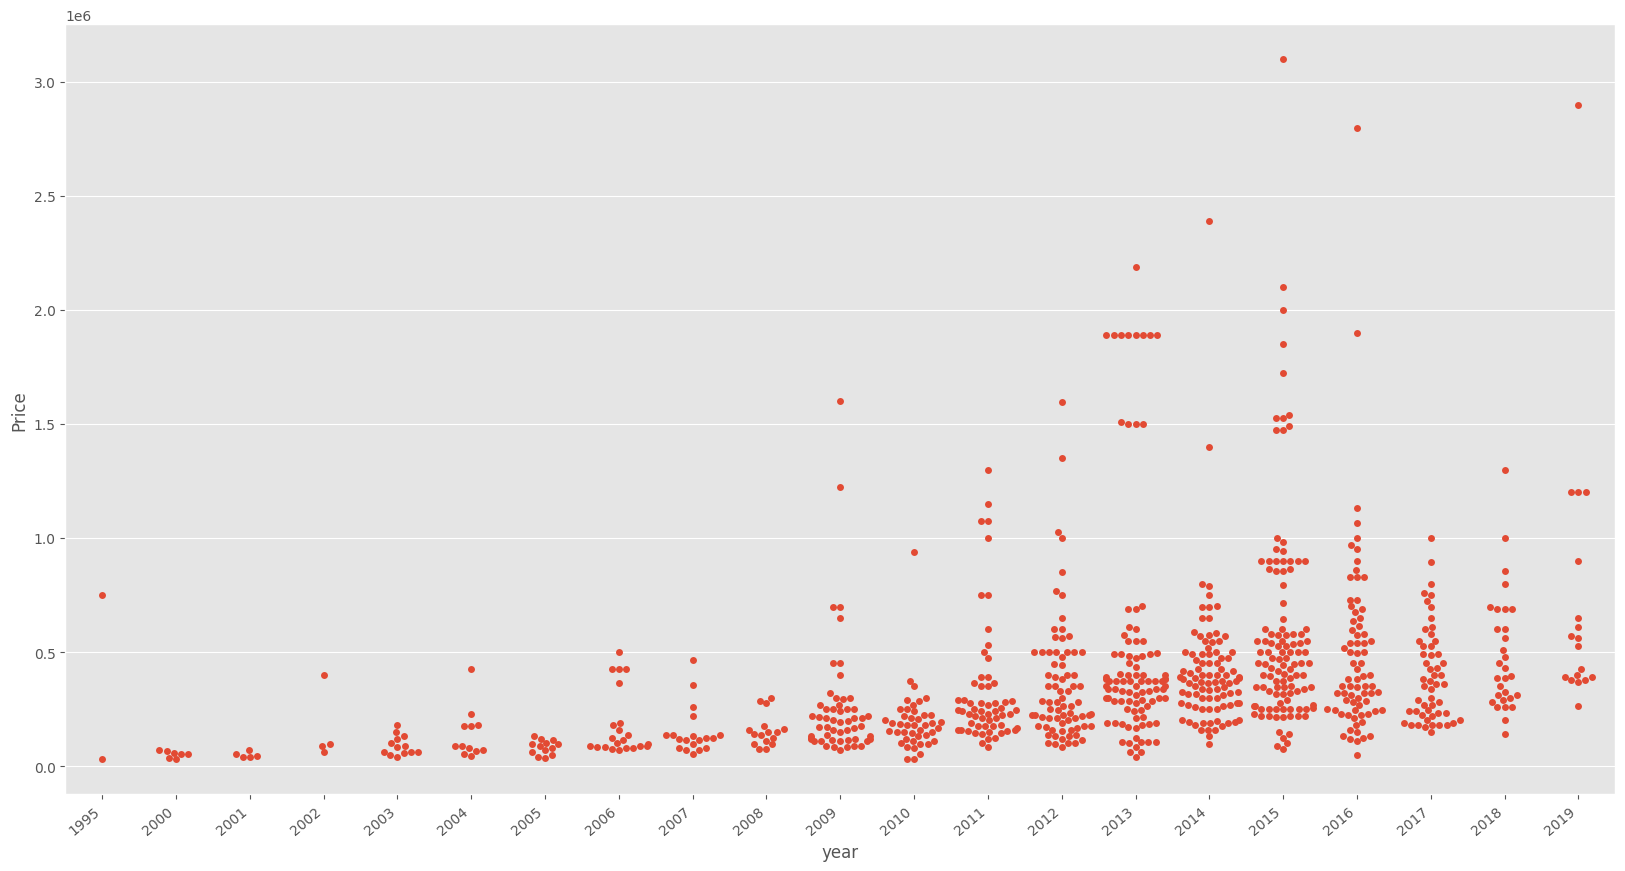

In [29]:
# here we are Checking relationship of Year with Price with the help of seaborn module

plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

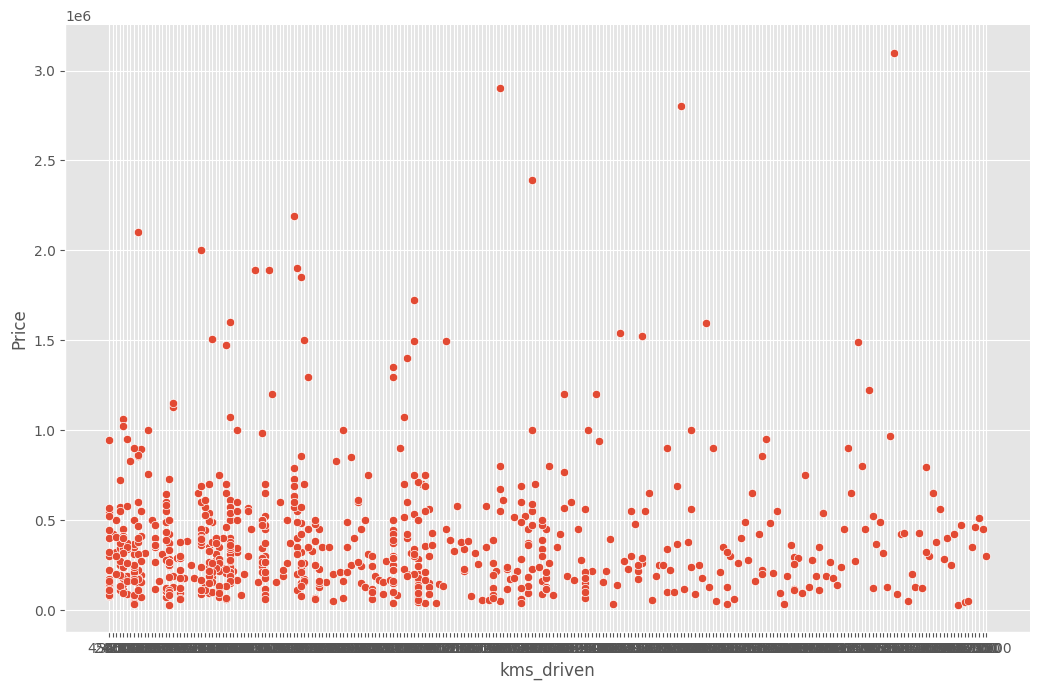

In [30]:
# here we are Checking relationship of kms_driven with Price
sns.relplot(x='kms_driven',y='Price',data=car,height=7,aspect=1.5)


<Axes: xlabel='fuel_type', ylabel='Price'>

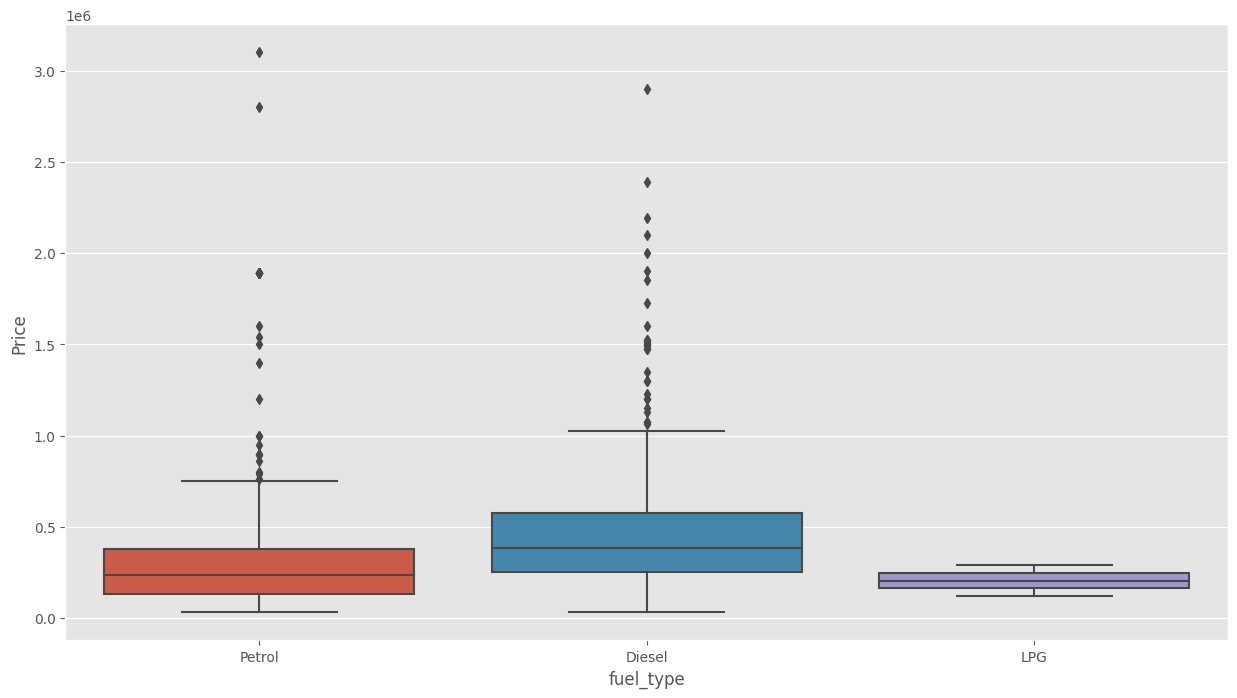

In [31]:
# here we are Checking relationship of Fuel Type with Price
plt.subplots(figsize=(15,8))
sns.boxplot(x='fuel_type',y='Price',data=car)

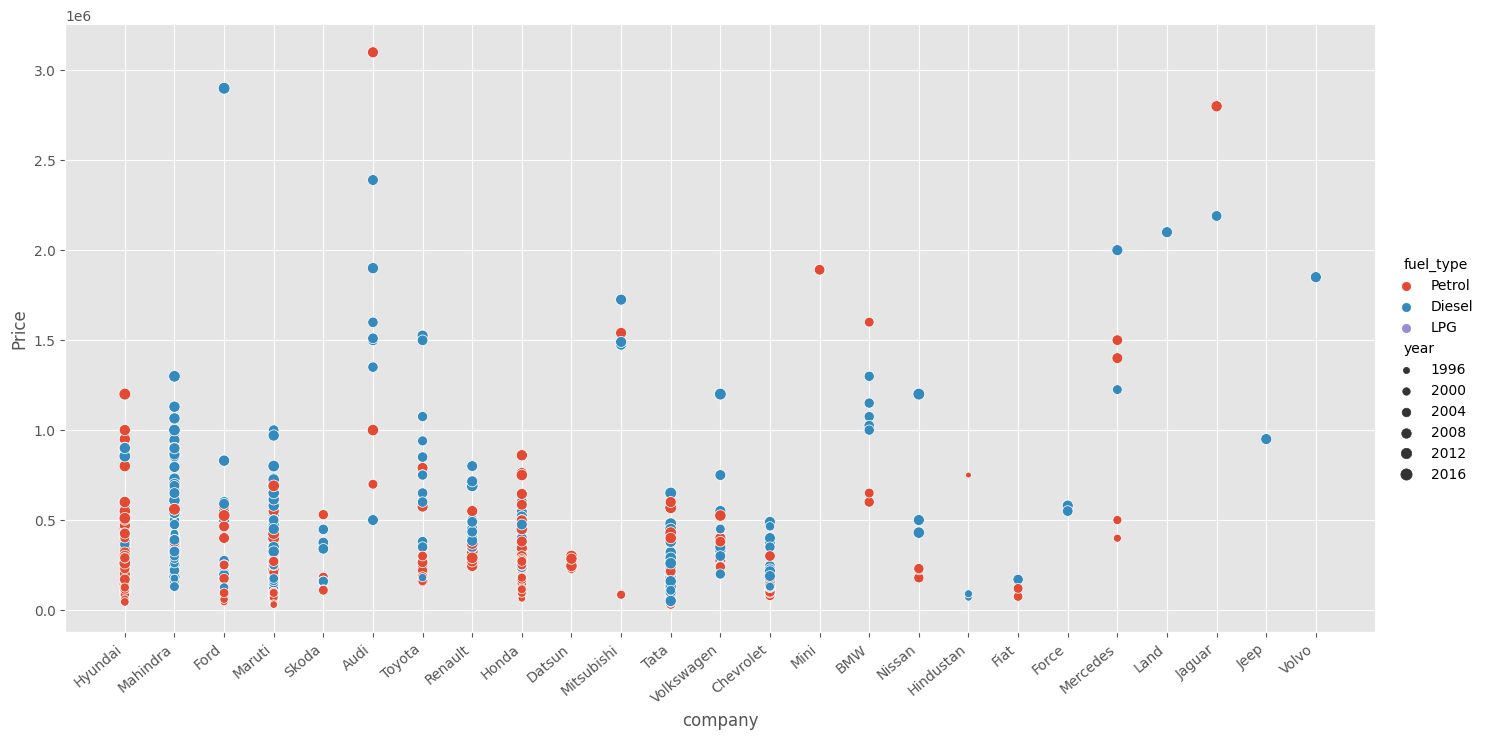

In [32]:
# Here we are checking the Relationship of Price with FuelType, Year and Company all together
ax=sns.relplot(x='company',y='Price',data=car,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

In [33]:
# Here we are extracting the training data into X and y Variables for preprocessing using Sklearn
X=car[['name','company','year','kms_driven','fuel_type']]
y=car['Price']

In [34]:
X


,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
812,Tata Indica V2,Tata,2009,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,132000,Petrol
814,Tata Zest XM,Tata,2018,27000,Diesel


In [35]:
y.shape

(815,)

In [36]:
# so here we are Applying Train Test Split for our cleaned data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [37]:
# importing neccessary modules for getting the predicted value and LR etc
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score


In [38]:
# here we are Creating an OneHotEncoder object to contain all the possible categories which are present in our dataset
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [39]:
# here we are Creating a column transformer to transform categorical columns into single one
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

In [40]:
lr=LinearRegression() # prediction through linear regression model

In [41]:
# here we are creating a pipeline for column transfer and also LR model for accuracy and training purpose
pipe=make_pipeline(column_trans,lr)

In [42]:
# Here we are fitting the model into x and y trains for future training with diff.values
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [43]:
y_pred=pipe.predict(X_test)

In [44]:
# here we are checking the R2 score of ur data set
r2_score(y_test,y_pred)

0.6585560584355179

In [45]:
# so here we are Finding the model with a random state of TrainTestSplit where the model needs to give almost 0.92 as r2_score so we are running diff.test cases
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [46]:
# so to know the max value obtained in the scores we use numpy and argmax
np.argmax(scores)

302

In [47]:
# adding the previous np argmax data to actual scores and comparing gives us 0.92 value so here we can stop and start predicting the car value
scores[np.argmax(scores)]

0.8991190499074018

In [48]:
# sample test whether it is working or not
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([430382.81414542])

In [49]:
#The best model is found at a certain random state so continue predicitng

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8991190499074018

In [50]:
# predicition Process Starts Here
pipe.predict(pd.DataFrame([['Audi A8','Audi',2018,200,'Petrol']],columns=['name','company','year','kms_driven','fuel_type']))

array([1787332.87404712])

In [51]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
       'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
       'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
       'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
       'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
       'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
       'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
       'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
       'Ford EcoSport Titanium', 'Ford EcoSport Trend',
       'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
       'Ford Figo Diese

In [52]:
import pickle

In [53]:
pickle.dump(pipe,open('Linear_Regression_Model.pkl','wb'))

In [54]:
 pipe.predict(pd.DataFrame([['Audi A4 1.8','Audi',2020,200,'Petrol']],columns=['name','company','year','kms_driven','fuel_type']))

array([1840007.48227996])